#Forecasting car prices - Brazil

####CRISP DM - Methodology for Data Science projects.
* Business Understanding
* Data Understanding
* Data Preparation
* Modelling
* Evaluation
* Deployment

#Business Understanding

* Forecasting prices.
* Likely Regression
* Reliable data( Tabela FIPE 2021)


#Data understanding

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/tabela_fipe.csv')
df.head()

,Marca,Modelo,Valor,Ano,Combustível,Automático
0,Acura,Integra GS 1.8,11165.0,1992,Gasolina,False
1,Acura,Integra GS 1.8,10167.0,1991,Gasolina,False
2,Acura,Legend 3.2/3.5,25574.0,1998,Gasolina,False
3,Acura,Legend 3.2/3.5,22561.0,1997,Gasolina,False
4,Acura,Legend 3.2/3.5,21388.0,1996,Gasolina,False


In [ ]:
df.tail()

,Marca,Modelo,Valor,Ano,Combustível,Automático
171346,Walk,Buggy Walk Sport 1.6 8V 58cv,19750.0,2009,Gasolina,False
171347,Walk,Buggy Walk Sport 1.6 8V 58cv,17531.0,2008,Gasolina,False
171348,Walk,Buggy Walk Sport 1.6 8V 58cv,16836.0,2007,Gasolina,False
171349,Walk,Buggy Walk Sport 1.6 8V 58cv,16125.0,2006,Gasolina,False
171350,Walk,Buggy Walk Sport 1.6 8V 58cv,12457.0,2005,Gasolina,False


In [ ]:
df.shape

(171351, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171351 entries, 0 to 171350
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Marca        171351 non-null  object 
 1   Modelo       171351 non-null  object 
 2   Valor        171351 non-null  float64
 3   Ano          171351 non-null  object 
 4   Combustível  171351 non-null  object 
 5   Automático   171351 non-null  bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
df.nunique()

Marca             90
Modelo          6198
Valor          23145
Ano               39
Combustível        3
Automático         2
dtype: int64

In [ ]:
# The 'Ano'(year) column is as object type. Let's change that.
#df['Ano'] = df['Ano'].astype(int)

In [ ]:
# There is a 'Zero KM' value in the 'Ano' column. The code above return an error.
df['Ano'].unique()

array(['1992', '1991', '1998', '1997', '1996', '1995', '1994', '1993',
       '2007', '2006', '2005', '2004', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', 'Zero KM', '2021', '2020', '2019',
       '2018', '2017', '2016', '1999', '2003', '2002', '2001', '2000',
       '1986', '1985', '1990', '1989', '1988', '1987', '2022'],
      dtype=object)

In [ ]:
df[df['Ano']== "Zero KM"]

,Marca,Modelo,Valor,Ano,Combustível,Automático
52,Agrale,MARRUÁ AM 200 2.8 CD TDI Diesel,379862.0,Zero KM,Diesel,False
67,Agrale,MARRUÁ AM 200 2.8 CS TDI Diesel,355525.0,Zero KM,Diesel,False
83,Agrale,MARRUÁ AM 200 Escolar 2.8 TDI Diesel,456633.0,Zero KM,Diesel,False
85,Agrale,MARRUÁ AM 200 Microbus 2.8 TDI Diesel,455566.0,Zero KM,Diesel,False
423,Audi,A3 Sed. P. Plus Tech 1.4 Flex TFSI Tip.,182545.0,Zero KM,Gasolina,False
...,...,...,...,...,...,...
171179,VW - VolksWagen,VIRTUS Sense 1.6 Flex 16V 5p Aut. (PCD),69990.0,Zero KM,Gasolina,True
171187,VW - VolksWagen,VOYAGE 1.0 Flex 12V 4p,68751.0,Zero KM,Gasolina,False
171200,VW - VolksWagen,VOYAGE 1.6 MSI Flex 16V 4p Aut.,80566.0,Zero KM,Gasolina,True
171205,VW - VolksWagen,VOYAGE 1.6 MSI Flex 8V 4p,74400.0,Zero KM,Gasolina,False


In [ ]:
# Replacing the 'Zero KM' value to 2022, since a zero km model is probably a 2022 model.
# And also because the highest number of records is 'Zero KM'. Factories usually try to sell the newest models more.
df['Ano'].value_counts()

Zero KM    6917
2018       6734
2012       6721
2015       6688
2013       6632
2014       6565
2016       6431
2019       6398
2017       6360
2020       6216
2011       6134
2010       5836
2009       5665
2000       5384
1999       5239
2008       5101
2006       5016
2021       5014
2005       4953
2001       4935
2007       4901
1998       4876
1995       4781
1997       4147
2002       4081
2004       3940
1994       3917
1996       3761
2003       3729
1993       3534
1992       2527
2022       2044
1991       1599
1989        863
1990        829
1988        803
1987        765
1986        740
1985        575
Name: Ano, dtype: int64

In [ ]:
df.loc[df['Ano'] =="Zero KM", 'Ano'] = '2022'
df['Ano'].value_counts()

2022    8961
2018    6734
2012    6721
2015    6688
2013    6632
2014    6565
2016    6431
2019    6398
2017    6360
2020    6216
2011    6134
2010    5836
2009    5665
2000    5384
1999    5239
2008    5101
2006    5016
2021    5014
2005    4953
2001    4935
2007    4901
1998    4876
1995    4781
1997    4147
2002    4081
2004    3940
1994    3917
1996    3761
2003    3729
1993    3534
1992    2527
1991    1599
1989     863
1990     829
1988     803
1987     765
1986     740
1985     575
Name: Ano, dtype: int64

In [ ]:
df['Ano'] = df['Ano'].astype(int)
df.dtypes

Marca           object
Modelo          object
Valor          float64
Ano              int64
Combustível     object
Automático        bool
dtype: object

In [ ]:
# Changing the data type of the 'Automático' column to int.
df['Automático'] = df['Automático'].astype(int)
df.dtypes

Marca           object
Modelo          object
Valor          float64
Ano              int64
Combustível     object
Automático       int64
dtype: object

In [ ]:
df.describe()

,Valor,Ano,Automático
count,1.713510e+05,171351.000000,171351.000000
mean,1.314815e+05,2008.058932,0.318942
std,3.870723e+05,9.384163,0.466068
min,1.674000e+03,1985.000000,0.000000
25%,1.978200e+04,2000.000000,0.000000
50%,4.351900e+04,2009.000000,0.000000
75%,1.029180e+05,2016.000000,1.000000
max,7.900000e+06,2022.000000,1.000000


###Vizualizing data

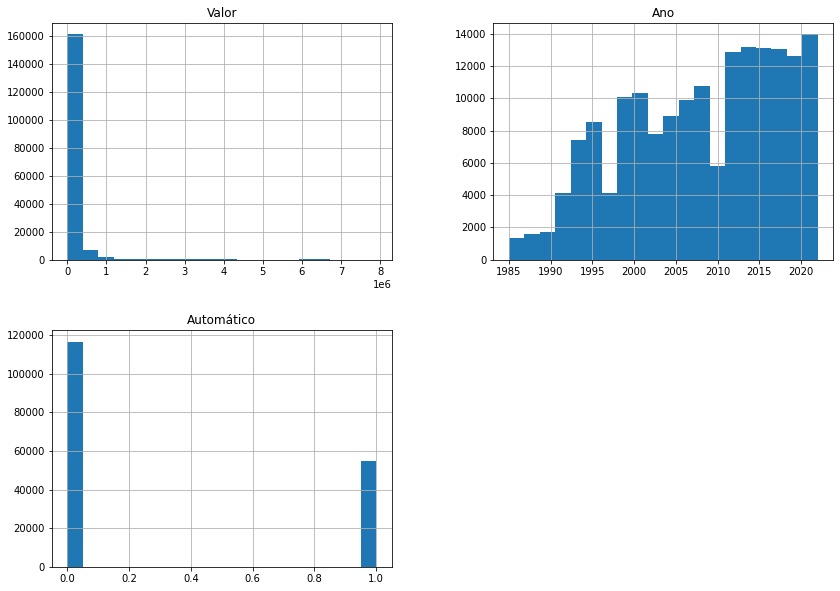

In [ ]:
df.hist(bins=20, figsize=(14, 10));
plt.show()

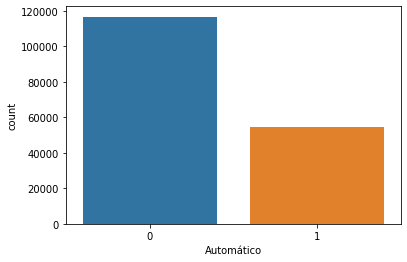

In [ ]:
sns.countplot(x=df['Automático']);

In [ ]:
df['Automático'].mean()
# Only 30% of car models are automatic.

0.31894182117408126

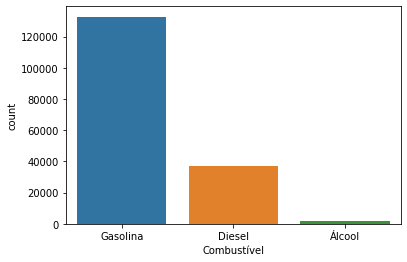

In [ ]:
sns.countplot(x=df['Combustível']);
# The majority of the models are Gasoline fuel type. 
#That can harm the learning of the algorithms and there for the predction prices on alcohool and diasel cars.

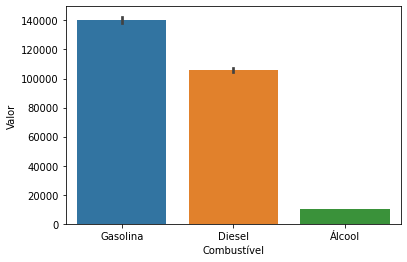

In [ ]:
sns.barplot(x='Combustível', y='Valor', data=df)
plt.show()
# Gas tend to be the fuel type of the more expensive cars.

In [ ]:
df[df['Valor'] == df['Valor'].max()].head()
# lamborghini Aventador is the more expensive car, and its fuel type is gasoline.

,Marca,Modelo,Valor,Ano,Combustível,Automático
61996,LAMBORGHINI,AVENTADOR 770-4 SVJ ROADSTER V12,7900000.0,2022,Gasolina,0
62545,LAMBORGHINI,AVENTADOR 770-4 SVJ ROADSTER V12,7900000.0,2022,Gasolina,0
63728,LAMBORGHINI,AVENTADOR 770-4 SVJ ROADSTER V12,7900000.0,2022,Gasolina,0
65050,LAMBORGHINI,AVENTADOR 770-4 SVJ ROADSTER V12,7900000.0,2022,Gasolina,0
66402,LAMBORGHINI,AVENTADOR 770-4 SVJ ROADSTER V12,7900000.0,2022,Gasolina,0


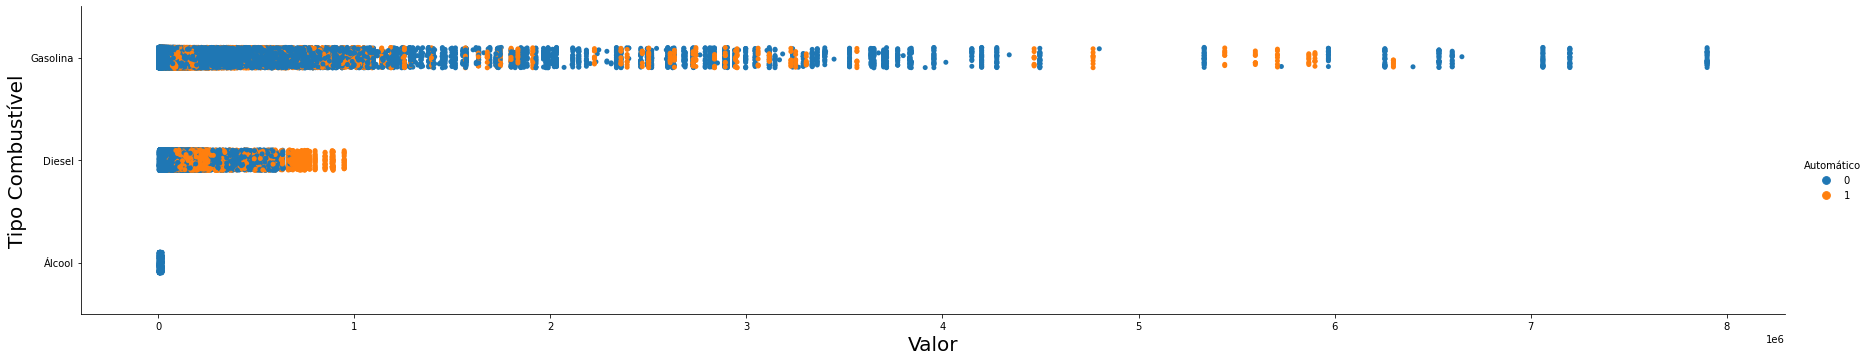

In [ ]:
sns.catplot(y="Combustível", x="Valor", hue="Automático", data=df, aspect = 5)
plt.xlabel("Valor",fontsize=20)
plt.ylabel("Tipo Combustível",fontsize=20)
plt.show()

# The super cars so to speak, which are the most expensive, are not automatic for performance reasons. The chart makes sense.
# At the same time there are few automatic cars among the cheapest, which also makes a lot of sense.

----------------------------------------
Marca: 90 unique values


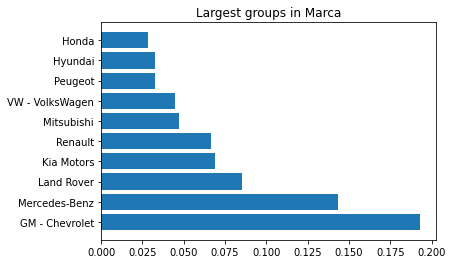

----------------------------------------
Modelo: 6198 unique values


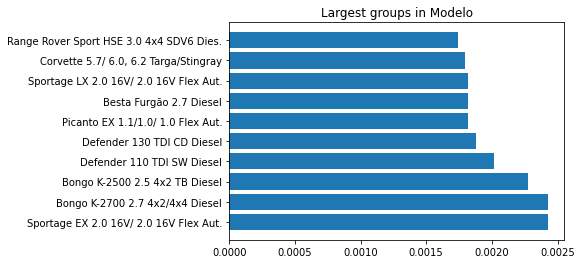

In [ ]:
# Let's get an overview in the car models and brands.
for feature in ('Marca', 'Modelo'):
    print('-' * 40)
    print(f'{feature}: {df[feature].nunique()} unique values')
    groups = df[feature].value_counts(normalize=True)[:10]
    plt.barh(groups.index, groups.values)
    plt.title(f'Largest groups in {feature}')
    plt.show()

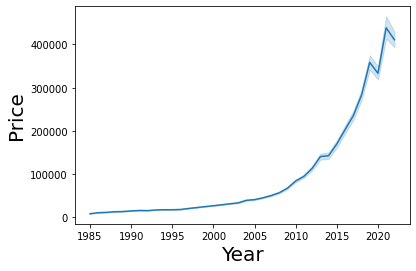

In [ ]:
# Finally, let's se the correlation between the car price and the car year.
sns.lineplot(y="Valor", x="Ano", data=df)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.show()


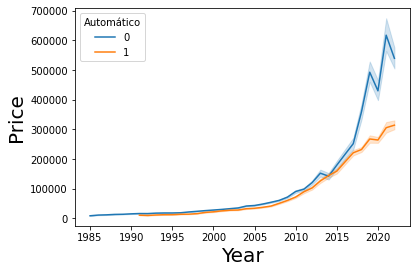

In [ ]:
# Let's see the automatic price 
sns.lineplot(y="Valor", x="Ano", hue='Automático', data=df)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.show()

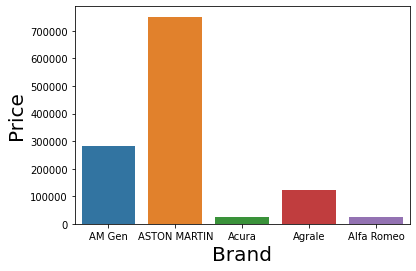

In [ ]:
# The top 5 brands with the most expensive models.
brands = df.groupby('Marca')['Valor'].mean().reset_index()
sns.barplot(y="Valor", x="Marca", data=brands.head())      #  head() function to get the top 5
plt.xlabel("Brand",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.show()


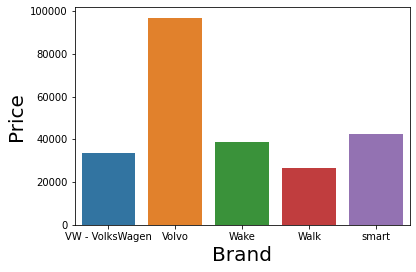

In [ ]:
# The top 5 brands with the cheapest models.
brands = df.groupby('Marca')['Valor'].mean().reset_index()
sns.barplot(y="Valor", x="Marca", data=brands.tail())        # tail() function the last 5 
plt.xlabel("Brand",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.show()


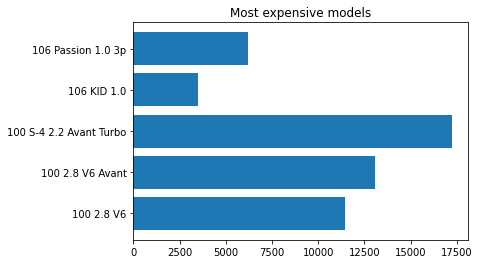

In [ ]:
# The top 5 expensive models.
models = df.groupby('Modelo')['Valor'].mean().reset_index()
plt.barh(models.Modelo.head(), models.Valor.head()) # head() function to get the top 5
plt.title('Most expensive models')
plt.show()


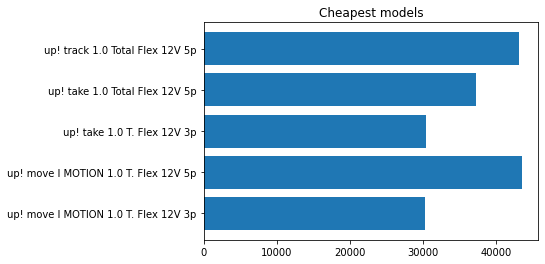

In [ ]:
# The top 5 cheapest models.
models = df.groupby('Modelo')['Valor'].mean().reset_index()
plt.barh(models.Modelo.tail(), models.Valor.tail()) # tail() function the last 5 
plt.title('Cheapest models')
plt.show()


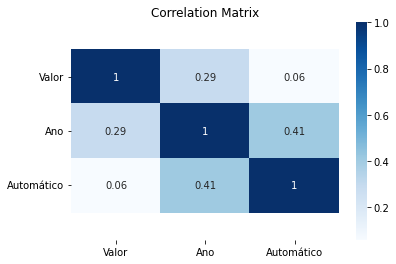

In [ ]:
# Finally, let's see the correlation between the variables.

correlation = df.corr()
ax = sns.heatmap(correlation, annot=True, cmap=plt.cm.Blues)
l, r = ax.get_ylim()
ax.set_ylim(l + 0.5, r - 0.5)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')

plt.show()

# There is a small correlation between the Year and the Automatic models, wicth make sense. There is a very few old cars that were automatic.

After we do some features engineering, we will se this correlation matrix again. 

# Data Preparation

In [ ]:
df.head()

,Marca,Modelo,Valor,Ano,Combustível,Automático
0,Acura,Integra GS 1.8,11165.0,1992,Gasolina,0
1,Acura,Integra GS 1.8,10167.0,1991,Gasolina,0
2,Acura,Legend 3.2/3.5,25574.0,1998,Gasolina,0
3,Acura,Legend 3.2/3.5,22561.0,1997,Gasolina,0
4,Acura,Legend 3.2/3.5,21388.0,1996,Gasolina,0


In [ ]:
# I will take only 50% of the data for the model.
df_int = df.copy()
df = df.sample(frac=0.5)

In [ ]:
# I need to find a way to replace this very large amount of car models.
# This will not be good for algorithm performance as well.
brands = df.groupby('Marca')['Modelo'].count().reset_index()
brands = brands.sort_values(by='Modelo', ascending=False)
brands

,Marca,Modelo
31,GM - Chevrolet,16553
60,Mercedes-Benz,12244
50,Land Rover,7367
45,Kia Motors,5909
71,Renault,5724
...,...,...
0,AM Gen,5
11,CBT Jipe,5
14,Cadillac,5
18,Cross Lander,3


**I have an idea.**
**I'm going to separate cars into 4 categories. Class 1 for entry cars, class 2 for popular cars, class 3 for more expensive cars and class 4 for super cars.**
**I'll separate them by quartile values.**




In [ ]:
df['Valor'].describe().astype(int)

count      85676
mean      131314
std       382360
min         1674
25%        19868
50%        43666
75%       102587
max      7900000
Name: Valor, dtype: int64

In [ ]:
car_class = []
for i, row in df.iterrows():
  if row['Valor'] <= 19782:
    car_class.append(1)
  elif row['Valor'] <= 43519:
    car_class.append(2)
  elif row['Valor'] <= 102918:
    car_class.append(3)
  elif row['Valor'] <= 7900000:
    car_class.append(4)


In [ ]:
len(car_class), len(df)
# Same lenght, witch is good.

(85676, 85676)

In [ ]:
df['Car_class'] = car_class

In [ ]:
df.loc[df['Valor'] == 7900000].head()
# Class 4 (super_car).
# Success!

,Marca,Modelo,Valor,Ano,Combustível,Automático,Car_class
87347,LAMBORGHINI,AVENTADOR 770-4 SVJ ROADSTER V12,7900000.0,2022,Gasolina,0,4
111729,LAMBORGHINI,AVENTADOR 770-4 SVJ ROADSTER V12,7900000.0,2022,Gasolina,0,4
67758,LAMBORGHINI,AVENTADOR 770-4 SVJ ROADSTER V12,7900000.0,2022,Gasolina,0,4
100317,LAMBORGHINI,AVENTADOR 770-4 SVJ ROADSTER V12,7900000.0,2022,Gasolina,0,4
69116,LAMBORGHINI,AVENTADOR 770-4 SVJ ROADSTER V12,7900000.0,2022,Gasolina,0,4


In [ ]:
# Now I will create a column with a code for each brand, to identify the brands after the onehotencoder that will be applied.
df_brand = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_brand['Marca'] = label.fit_transform(df_brand['Marca'])

In [ ]:
brand_column = df_brand['Marca']

In [ ]:
df['Brand_code'] = brand_column

In [ ]:
df.head()
# Done!

,Marca,Modelo,Valor,Ano,Combustível,Automático,Car_class,Brand_code
164208,VW - VolksWagen,Polo Comfort. 200 TSI 1.0 Flex 12V Aut.,71643.0,2019,Gasolina,1,3,84
119748,Mercedes-Benz,E-250 Coupe 2.0 TB 211cv Aut.,162187.0,2015,Gasolina,1,4,60
68799,Kia Motors,Cerato 1.6 16V Mec.,18900.0,2006,Gasolina,0,1,45
120444,Mercedes-Benz,SLK-55 AMG V8 24V,419936.0,2016,Gasolina,0,4,60
26353,GM - Chevrolet,ONIX HATCH LTZ 1.4 8V FlexPower 5p Aut.,47353.0,2015,Gasolina,1,3,31


In [ ]:
# Saving the data with the new coloumns.
df.to_csv('Car_prices_brazil_clean.csv', index=False)

In [ ]:
df.dtypes

Marca           object
Modelo          object
Valor          float64
Ano              int64
Combustível     object
Automático       int64
Car_class        int64
Brand_code       int64
dtype: object

In [ ]:
# Let's see the correlation now with the new columns.
df.corr()

,Valor,Ano,Automático,Car_class,Brand_code
Valor,1.000000,0.293854,0.062169,0.364940,0.040229
Ano,0.293854,1.000000,0.409497,0.754522,0.080551
Automático,0.062169,0.409497,1.000000,0.368518,0.047262
Car_class,0.364940,0.754522,0.368518,1.000000,0.085499
Brand_code,0.040229,0.080551,0.047262,0.085499,1.000000


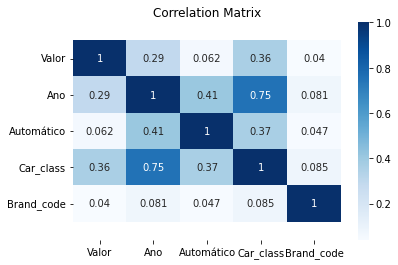

In [ ]:
correlation = df.corr()
ax = sns.heatmap(correlation, annot=True, cmap=plt.cm.Blues)
l, r = ax.get_ylim()
ax.set_ylim(l + 0.5, r - 0.5)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')

plt.show()


Perfect! Now I can use only numerical for the algorthmns.

###Preparing the features

####Separating the features

In [ ]:
# Getting the predictive features in the numpy array format, wicht is necessary for the Machine learning models.
X = df.iloc[:, 3:].values


In [ ]:
# Getting the target feature.
y = df['Valor'].values
y

array([ 71643., 162187.,  18900., ...,  26850., 404652.,  35438.])

####Using the Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Using the LabelEncoder to the "Combustível" column.

label_encoder_combustivel = LabelEncoder()
X[:,1] = label_encoder_combustivel.fit_transform(X[:,1])

X


array([[2019, 1, 1, 3, 84],
       [2015, 1, 1, 4, 60],
       [2006, 1, 0, 1, 45],
       ...,
       [2007, 1, 0, 2, 27],
       [2018, 1, 1, 4, 50],
       [2014, 1, 0, 2, 64]], dtype=object)

####Using the Standard Scaler

In [ ]:
# Standard Scaler will be used with some algorithmns.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
scaler_y = StandardScaler()
y_scaler = scaler_y.fit_transform(y.reshape(-1, 1))

In [ ]:
X_scaler.shape, y_scaler.shape
# Ok!

((85676, 5), (85676, 1))

In [ ]:
X.shape, y.shape
# Ok!

((85676, 5), (85676,))

####Using the Normalizer

In [ ]:
from sklearn.preprocessing import Normalizer

X_normalize = X.copy()
X_normalize = Normalizer().fit_transform(X)

In [ ]:
X_normalize

array([[9.99134298e-01, 4.94865923e-04, 4.94865923e-04, 1.48459777e-03,
        4.15687375e-02],
       [9.99554756e-01, 4.96056951e-04, 4.96056951e-04, 1.98422780e-03,
        2.97634170e-02],
       [9.99748234e-01, 4.98378980e-04, 0.00000000e+00, 4.98378980e-04,
        2.24270541e-02],
       ...,
       [9.99908901e-01, 4.98210713e-04, 0.00000000e+00, 9.96421426e-04,
        1.34516893e-02],
       [9.99690983e-01, 4.95387009e-04, 4.95387009e-04, 1.98154803e-03,
        2.47693504e-02],
       [9.99494860e-01, 4.96273515e-04, 0.00000000e+00, 9.92547031e-04,
        3.17615050e-02]])

In [ ]:
X_normalize.shape, y.shape
# ok

((85676, 5), (85676,))

####Created Variables

* The variables "X" and "y" will be used with the Linear Regression, Decision tree and Random forest models.
* The variables X_scale and y_scale will be used with Neural Network and XGBoost models.
* The variables X_normalize, and y will be use to test if its better for the Neural Network and XGB than the standard scale.
They work diferentily to performe the normalization of the data.


# Modelling

In [ ]:
# Importing GridSearch and Cross Val to find out the best parameters and train the models.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

# Importing the algorithmns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Importing the metric tu evaluate
from sklearn.metrics import mean_absolute_error

####Grid Search
OBS: We will not use the Grid on the Linear Regression and Polynomial models.
Just go with the default parameters.

In [ ]:
# Multi Linear Regression
lr = LinearRegression()
lr.fit(X_scaler,y_scaler.ravel())
pre = lr.predict(X_scaler)
lr.score(X_scaler, y_scaler.ravel())

0.15364733448103585

In [ ]:
# Linear Regression Polynomial
poly_x = PolynomialFeatures(degree = 6)   # The best degree I found
X_poly = poly_x.fit_transform(X)
scaler_x = StandardScaler()
X_poly_scaler = scaler_x.fit_transform(X_poly)


lr_poly = LinearRegression()
lr_poly.fit(X_poly_scaler, y_scaler.ravel())
lr_poly.score(X_poly_scaler, y_scaler.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


-0.0009360712088919475

In [ ]:
# Decision Tree Regressor
parameters = {'criterion': ['mse'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 20, 60, 100],
              'min_samples_leaf': [1, 5, 20, 60]}

tree_grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=parameters)
tree_grid.fit(X, y)
best_parameters = tree_grid.best_params_
best_result = tree_grid.best_score_
print(best_parameters)
print(best_result)



{'criterion': 'mse', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
0.8779697796806216


In [ ]:
tree = DecisionTreeRegressor(criterion='mse', min_samples_leaf=1, min_samples_split=20, splitter='best')
tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Random Forest Regressor
parameters = {'criterion': ['mse'],
              'n_estimators': [100, 150],
              'min_samples_split':[2, 10],
              'min_samples_leaf':[1, 10]}

Rforest_grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters)
Rforest_grid.fit(X, y)
best_parameters = Rforest_grid.best_params_
best_result = Rforest_grid.best_score_
print(best_parameters)
print(best_result)

{'criterion': 'mse', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
0.8777852540162996


In [ ]:
Rforest = RandomForestRegressor(criterion='mse', min_samples_leaf=1, min_samples_split=10, n_estimators=150)
Rforest.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_scaler, y_scaler.ravel(), test_size=0.15, random_state=1)

parameters = {'n_estimators': [1000, 1500], 'learning_rate': [0.01, 0.05, 0.10],
              'n_jobs': [8], 'early_stopping_rounds':[5, 6, 7]}

xgb_grid = GridSearchCV(estimator=XGBRegressor(), param_grid=parameters)
xgb_grid.fit(X_scaler, y_scaler.ravel())
best_parameters = xgb_grid.best_params_
best_result = xgb_grid.best_score_
print(best_parameters)
print(best_result)


# A experiment that a did.
"""xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, n_jobs=6)
xgb.fit(X_train_xgb, y_train_xgb, 
             early_stopping_rounds=5, 
             eval_set=[(X_test_xgb, y_test_xgb)], 
             verbose=False)
xgb.score(X_scaler, y_scaler.ravel())"""

[02:10:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:10:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:11:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:11:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:12:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:12:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

'xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, n_jobs=6)\nxgb.fit(X_train_xgb, y_train_xgb, \n             early_stopping_rounds=5, \n             eval_set=[(X_test_xgb, y_test_xgb)], \n             verbose=False)\nxgb.score(X_scaler, y_scaler.ravel())'

In [ ]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01, n_jobs=8, early_stopping_rounds=5)
xgb.fit(X_scaler, y_scaler.ravel())

[02:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=5,
             gamma=0, importance_type='gain', learning_rate=0.01,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators=1000, n_jobs=8, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
# Neural Network


nn = MLPRegressor(max_iter=1500, hidden_layer_sizes=(80,80), tol=0.0001, batch_size=56)
nn.fit(X_scaler, y_scaler.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size=56, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(80, 80), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
import pickle
with open('Car_prices_models_before_cross.pkl', mode = 'wb') as f:
  pickle.dump([tree, Rforest, nn, xgb], f)

#Evaluation

###Cross Validation

In [ ]:
# loading the models
import pickle
with open('Car_prices_models_before_cross.pkl', 'rb') as f:
  tree, Rforest, nn, xgb = pickle.load(f)

[20:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results_tree = []
results_random_forest = []
results_nn = []
results_xgb = []


for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  # Tree
  scores = cross_val_score(tree, X, y, cv = kfold)
  results_tree.append(scores.mean())

  # Random Forest
  scores = cross_val_score(Rforest, X, y, cv = kfold)
  results_random_forest.append(scores.mean())

  # Neural Network Regressor
  scores = cross_val_score(nn, X_scaler, y_scaler.ravel(), cv = kfold)
  results_nn.append(scores.mean())

  # XGBRegressor
  scores = cross_val_score(xgb, X_scaler, y_scaler.ravel(), cv = kfold)
  results_xgb.append(scores.mean())

0
[21:32:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

In [ ]:
model_results = pd.DataFrame({'Decision Tree Regressor': results_tree, 'Random Forest Regressor': results_random_forest,'Neural Network Regressor': results_nn,
                              'XGBRegressor':results_xgb})
model_results

In [ ]:
model_results.to_csv(" Model_Results.csv", index=False)

In [ ]:
import pickle
with open('Car_prices_models.pkl', mode = 'wb') as f:
  pickle.dump([tree, Rforest, nn, xgb], f)

#Evaluation

In [ ]:
model_results.describe()

In [ ]:
model_results.var()

In [ ]:
(model_results.std() / model_results.mean()) * 100

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
tree_prediction = tree.predict(X)
mean_absolute_error(tree_prediction,y)


In [ ]:
Rforest_prediction = Rforest.predict(X)
mean_absolute_error(Rforest_prediction, y)